# Assignment 3

## Instructions
- Run this notebook on ```Google Colab(preferable)```
- Write your code and analysis in the indicated cells.
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not attempt to change the contents of other cells. 

## Packages Used
- Keras [link](https://keras.io/guides/)

## Submission
- Rename the notebook to `<roll_number>_Assignment3_Q1.ipynb`.

## Question 1

This question is based on seminal work by Zhang et al. The paper is titled 'Understanding deep learning requires rethinking generalization'. The paper talks about how the traditional methods fail to explain generalization of neural network. They show that a sufficiently parameterized network can easily fit a random labeling of the training data. This fitting cannot be curbed by explicit regularization.


## Q) 1.1 
Lets take a hello world dataset for ML algorithm the MNIST!
This question requires you to train a convolutional neural network.
Architecture: 4 layers of convolution with 64 filters in each layer. Keep activation map size same using padding.

In [ ]:
from tensorflow import keras   # feel free to use MNIST data from other sources 
import numpy as np

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [ ]:
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

print("Train data shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

Train data shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


#### One-hot-encode your labels here

In [ ]:
print ('label shape: ',np.shape(y_train),np.shape(y_test))
def encode(y):
    return keras.utils.to_categorical(y)

y_train = encode(y_train)
y_test = encode(y_test)
print ('label shape: ',np.shape(y_train),np.shape(y_test))
y_train[0]

label shape:  (60000,) (10000,)
label shape:  (60000, 10) (10000, 10)


array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

#### Define the model mentioned above
    1) Print the number of trainable parameters
     Use sgd optimizer with softmax at last layer 
     Train the model until convergence (use test data only for model selection and early stopping!)
    2) Report the train and test accuracy
    3) Plot the train and test accuracy and loss throughout the training

In [ ]:
#code here
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from keras.layers.advanced_activations import LeakyReLU
from keras.losses import categorical_crossentropy
from keras.callbacks import EarlyStopping

def create_model():
  model = Sequential()
  model.add(Conv2D(64, kernel_size=4, activation='relu', padding='same', input_shape=x_train[0].shape))
  model.add(Conv2D(64, kernel_size=4, activation='relu', padding='same'))
  model.add(Dropout(0.4))
  model.add(Conv2D(64, kernel_size=4, activation='relu', padding='same'))
  model.add(Conv2D(64, kernel_size=4, activation='relu', padding='same'))
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(10, activation='softmax'))

  # sgd_fn = SGD(learning_rate=0.01, momentum=0.9)
  model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
  return model
 

In [ ]:

def get_trained_model(model, x_train, y_train, x_test, y_test):
  earlyStopping = EarlyStopping(monitor = "val_loss", patience = 2)
  trained_model = model.fit(x_train, y_train, batch_size=60, epochs=20, validation_data=(x_test, y_test), callbacks=earlyStopping)
  return trained_model

In [ ]:
model = create_model()
trained_model = get_trained_model(model, x_train, y_train, x_test, y_test)

test_eval = model.evaluate(x_test, y_test)

print("-----------------------------------")
print("Test Loss: ", test_eval[0])
print("Test Accuracy: ", test_eval[1])

Epoch 1/20
1000/1000 [==============================] - 42s 32ms/step - loss: 0.4868 - accuracy: 0.8495 - val_loss: 0.1381 - val_accuracy: 0.9581
Epoch 2/20
1000/1000 [==============================] - 32s 32ms/step - loss: 0.1535 - accuracy: 0.9541 - val_loss: 0.0886 - val_accuracy: 0.9719
Epoch 3/20
1000/1000 [==============================] - 32s 32ms/step - loss: 0.1062 - accuracy: 0.9677 - val_loss: 0.0619 - val_accuracy: 0.9792
Epoch 4/20
1000/1000 [==============================] - 33s 33ms/step - loss: 0.0804 - accuracy: 0.9750 - val_loss: 0.0530 - val_accuracy: 0.9830
Epoch 5/20
1000/1000 [==============================] - 32s 32ms/step - loss: 0.0650 - accuracy: 0.9792 - val_loss: 0.0501 - val_accuracy: 0.9829
Epoch 6/20
1000/1000 [==============================] - 32s 32ms/step - loss: 0.0552 - accuracy: 0.9832 - val_loss: 0.0450 - val_accuracy: 0.9862
Epoch 7/20
1000/1000 [==============================] - 32s 32ms/step - loss: 0.0459 - accuracy: 0.9857 - val_loss: 0.0418 -

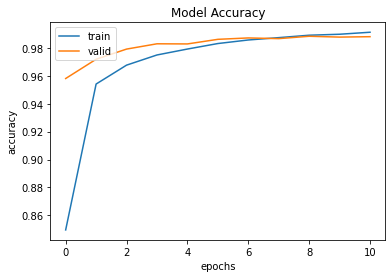

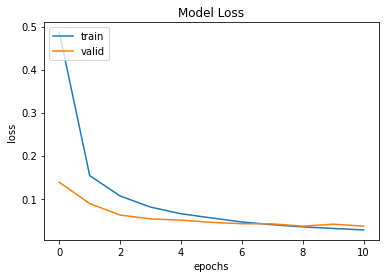

In [ ]:
from matplotlib import pyplot as plt

def plot_graph(trained_model):
  accuracy = trained_model.history['accuracy']
  val_accuracy = trained_model.history['val_accuracy']
  loss = trained_model.history['loss']
  val_loss = trained_model.history['val_loss']

  plt.plot(accuracy)
  plt.plot(val_accuracy)
  plt.title('Model Accuracy')
  plt.xlabel('epochs')
  plt.ylabel('accuracy')
  plt.legend(['train','valid'], loc='upper left')
  plt.show()
  
  plt.plot(loss)
  plt.plot(val_loss)
  plt.title('Model Loss')
  plt.xlabel('epochs')
  plt.ylabel('loss')
  plt.legend(['train','valid'], loc='upper left')
  plt.show()


plot_graph(trained_model)



## Q) 1.2
Now lets start adding label noise to the dataset


1) Randomize 20% of train labels and repeat Q1 (1,2 & 3)

2) Randomize 40% of train labels and repeat Q1 (3)

3) Randomize 60% of train labels and repeat Q1 (3)

4) Randomize 80% of train labels and repeat Q1 (3)

5) Randomize 100% of train labels and repeat Q1 (3)


In [ ]:
import random

def randomize_train_labels(y_train, percentage):
  data_len = len(y_train)
  size = int(percentage * float(data_len))
  lst = random.sample(range(0,data_len), size)
  
  for idx in lst:
    tmp = [0] * 10
    tmp_idx = random.sample(range(0,10), 1)[0]
    tmp[tmp_idx] = 1

    y_train[idx] = tmp

  return y_train


Epoch 1/20
1000/1000 [==============================] - 16s 16ms/step - loss: 2.3246 - accuracy: 0.1005 - val_loss: 2.2925 - val_accuracy: 0.1507
Epoch 2/20
1000/1000 [==============================] - 16s 16ms/step - loss: 2.3019 - accuracy: 0.1039 - val_loss: 2.2793 - val_accuracy: 0.2621
Epoch 3/20
1000/1000 [==============================] - 16s 16ms/step - loss: 2.3011 - accuracy: 0.1066 - val_loss: 2.2614 - val_accuracy: 0.3743
Epoch 4/20
1000/1000 [==============================] - 16s 16ms/step - loss: 2.2993 - accuracy: 0.1091 - val_loss: 2.2483 - val_accuracy: 0.3700
Epoch 5/20
1000/1000 [==============================] - 16s 16ms/step - loss: 2.2975 - accuracy: 0.1124 - val_loss: 2.2535 - val_accuracy: 0.2762
Epoch 6/20
1000/1000 [==============================] - 16s 16ms/step - loss: 2.2947 - accuracy: 0.1136 - val_loss: 2.2340 - val_accuracy: 0.3014
Epoch 7/20
1000/1000 [==============================] - 16s 16ms/step - loss: 2.2924 - accuracy: 0.1157 - val_loss: 2.2323 -

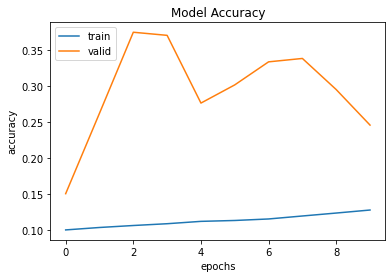

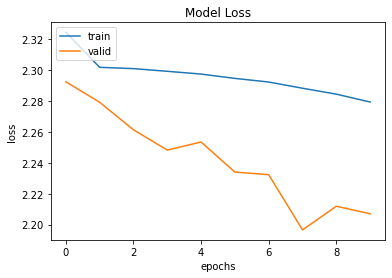

Epoch 1/20
1000/1000 [==============================] - 16s 16ms/step - loss: 2.2750 - accuracy: 0.1295 - val_loss: 2.2000 - val_accuracy: 0.2589
Epoch 2/20
1000/1000 [==============================] - 16s 16ms/step - loss: 2.2687 - accuracy: 0.1357 - val_loss: 2.2033 - val_accuracy: 0.2151
Epoch 3/20
1000/1000 [==============================] - 16s 16ms/step - loss: 2.2604 - accuracy: 0.1398 - val_loss: 2.2187 - val_accuracy: 0.2077


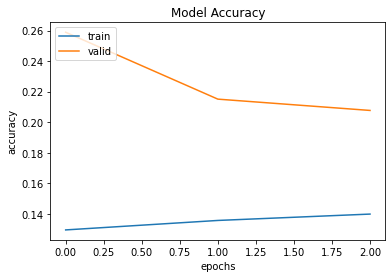

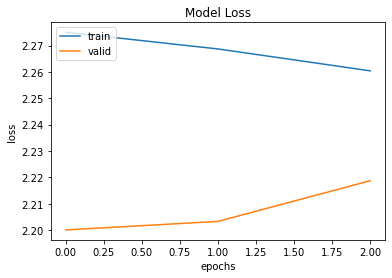

Epoch 1/20
1000/1000 [==============================] - 16s 16ms/step - loss: 2.2524 - accuracy: 0.1436 - val_loss: 2.2193 - val_accuracy: 0.1893
Epoch 2/20
1000/1000 [==============================] - 16s 16ms/step - loss: 2.2425 - accuracy: 0.1511 - val_loss: 2.2280 - val_accuracy: 0.1644
Epoch 3/20
1000/1000 [==============================] - 16s 16ms/step - loss: 2.2326 - accuracy: 0.1542 - val_loss: 2.2317 - val_accuracy: 0.1646


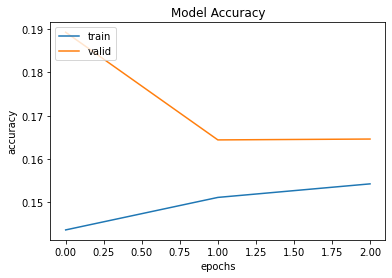

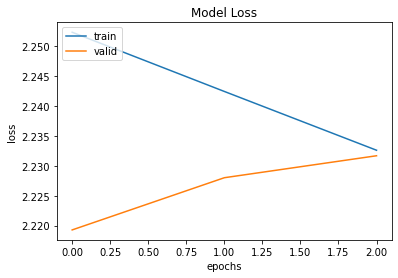

Epoch 1/20
1000/1000 [==============================] - 16s 16ms/step - loss: 2.2219 - accuracy: 0.1620 - val_loss: 2.2092 - val_accuracy: 0.1714
Epoch 2/20
1000/1000 [==============================] - 16s 16ms/step - loss: 2.2071 - accuracy: 0.1669 - val_loss: 2.2480 - val_accuracy: 0.1494
Epoch 3/20
1000/1000 [==============================] - 16s 16ms/step - loss: 2.1945 - accuracy: 0.1737 - val_loss: 2.2219 - val_accuracy: 0.1616


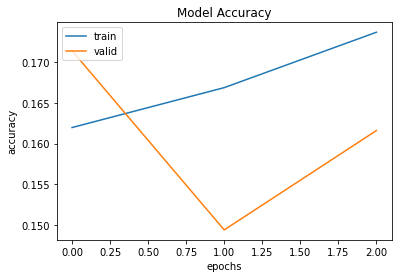

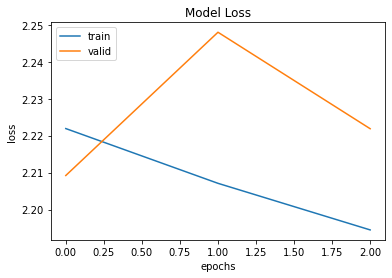

Epoch 1/20
1000/1000 [==============================] - 16s 16ms/step - loss: 2.1789 - accuracy: 0.1777 - val_loss: 2.2314 - val_accuracy: 0.1467
Epoch 2/20
1000/1000 [==============================] - 16s 16ms/step - loss: 2.1612 - accuracy: 0.1861 - val_loss: 2.2525 - val_accuracy: 0.1445
Epoch 3/20
1000/1000 [==============================] - 16s 16ms/step - loss: 2.1435 - accuracy: 0.1922 - val_loss: 2.2735 - val_accuracy: 0.1488


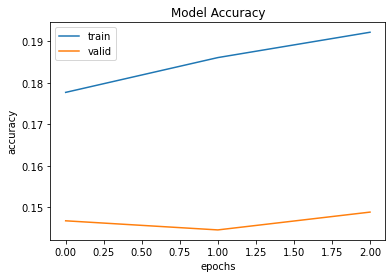

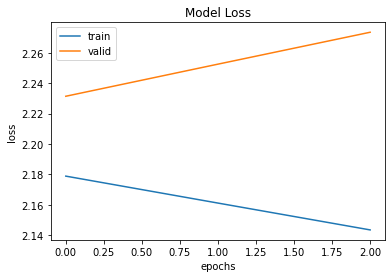

In [ ]:
y_train_1 = randomize_train_labels(y_train, 0.2)
y_train_2 = randomize_train_labels(y_train, 0.4)
y_train_3 = randomize_train_labels(y_train, 0.6)
y_train_4 = randomize_train_labels(y_train, 0.8)
y_train_5 = randomize_train_labels(y_train, 1)


trained_model = get_trained_model(model, x_train, y_train_1, x_test, y_test)
plot_graph(trained_model)

trained_model = get_trained_model(model, x_train, y_train_2, x_test, y_test)
plot_graph(trained_model)

trained_model = get_trained_model(model, x_train, y_train_3, x_test, y_test)
plot_graph(trained_model)

trained_model = get_trained_model(model, x_train, y_train_4, x_test, y_test)
plot_graph(trained_model)

trained_model = get_trained_model(model, x_train, y_train_5, x_test, y_test)
plot_graph(trained_model)